In [ ]:
!pip install -U spacy
!pip install transformers
!python -m spacy download en_core_web_sm
import tqdm
import random
import pandas as pd

# compute correlations

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/Colab Notebooks/master_thesis

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/master_thesis


In [ ]:
import pickle
import pandas as pd

df_simplicityDA = pd.read_csv("./src/metaeval-simplification/simplicity_DA.csv")
with open('./src/metaeval-simplification/df_metrics_segment_simplicityDA.pickle', 'rb') as f:
    df_metrics_segment = pickle.load(f)
with open('./src/simplicityDA_silver_test.pickle', 'rb') as f:
    df_simplicityDA_silver = pickle.load(f)

In [ ]:
with open('./src/simplicityDA_silver_train.pickle', 'rb') as f:
    df_simplicityDA_silver_train = pickle.load(f)

In [ ]:
df_simplicityDA_silver_train

,sent_id,sys_name,orig_sent,simp_sent,sys_type,fluency,fluency_zscore,meaning,meaning_zscore,simplicity,simplicity_zscore,inter,group_id
0,268,ACCESS,Prunk is a member of Institute of European His...,Prunk is a member of Institute of European His...,NeuralSeq2Seq,77.400000,0.152400,77.333333,0.530362,71.333333,0.611060,[Prunk is a member of Institute of European Hi...,0
1,67,SBMT-SARI,"In return, Rollo swore fealty to Charles, conv...","In return, Rollo swore fealty to Charles, conv...",SBMT,87.866667,0.512595,96.466667,1.142803,90.933333,1.257177,[In return Rollo swore fealty to Charles conve...,1
2,341,SBMT-SARI,From 1900 to 1920 many new facilities were con...,From 1900 to 1920 many new plants were built o...,SBMT,79.133333,0.119438,68.533333,0.284701,53.800000,0.158894,[From 1900 to 1920 many new plants were constr...,2
3,278,PBMT-R,Mercury is similar in appearance to the Moon: ...,Mercury is similar in appearance to the Moon: ...,PBMT,90.333333,0.598145,90.666667,0.965649,71.600000,0.664848,[Mercury is similar in appearance to the Moon ...,3
5,208,DMASS-DCSS,The plant is considered a living fossil.,The plant is thought to be a living fossil.,NeuralSeq2Seq,89.666667,0.509301,96.400000,1.102373,66.600000,0.558290,[],5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,296,SBMT-SARI,Version 2009.1 provides a USB installer to cre...,Print 2009.1 offers a USB driver to create a L...,SBMT,69.333333,-0.022690,75.466667,0.274683,64.200000,0.374245,[Version 2009.1 offers a USB installer to crea...,594
595,210,Hybrid,Orchestration Stravinsky first conceived of wr...,Orchestration Stravinsky conceived of writing ...,Semantics+PBMT,68.333333,-0.092967,89.933333,0.846412,63.400000,0.336182,[],595
596,202,Dress-Ls,"The album, however, was banned from many recor...",The album was banned from many record stores n...,NeuralSeq2Seq,99.600000,0.970276,95.333333,1.027604,81.800000,0.890318,[],596
598,148,Dress-Ls,"Later, Esperanto speakers began to see the lan...",Esperanto speakers began to see the language a...,NeuralSeq2Seq,71.533333,-0.001330,71.000000,0.274918,74.133333,0.614088,[Esperanto speakers began to see the language ...,598


In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Text(0, 0.5, 'frequency')

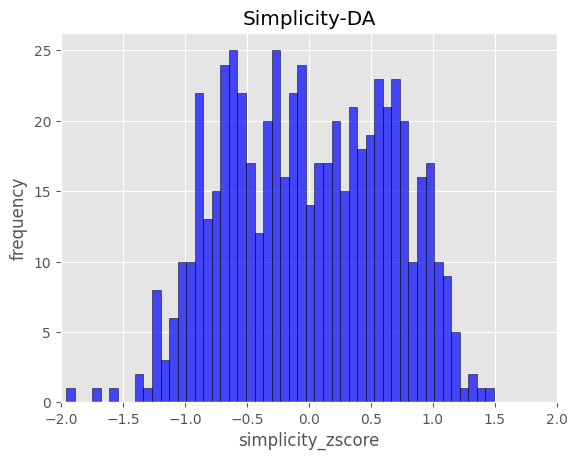

In [ ]:
df_simplicityDA['simplicity_zscore'].hist(bins=50, color='b', alpha=0.7,edgecolor='black')
plt.title('Simplicity-DA')
plt.xlim(-2,2)
plt.xlabel('simplicity_zscore')
plt.ylabel('frequency')

In [ ]:
df_simplicityDA['simplicity_zscore'].mean()

1.5000005681997664e-11

In [ ]:
from scipy.stats import zscore, spearmanr, pearsonr
def standardise_ratings(df, rater_id, aspect):
    return df.groupby(by=rater_id)[aspect].transform(lambda x: zscore(x))
df_simplicityDA = pd.read_csv("./src/metaeval-simplification/simplicity_DA.csv")

df_hg = pd.read_csv("./src/simplification_human_evaluations/questeval_simplification_likert_ratings.csv")
df_hg = df_hg[df_hg['simplification_type'] == 'human']
simplicity_zscore = standardise_ratings(df_hg[df_hg['aspect'] == 'simplicity'], rater_id='worker_id', aspect="rating")
meaning_zscore = standardise_ratings(df_hg[df_hg['aspect'] == 'meaning'], rater_id='worker_id', aspect="rating")
fluency_zscore = standardise_ratings(df_hg[df_hg['aspect'] == 'fluency'], rater_id='worker_id', aspect="rating")
df_hg_simp = df_hg[df_hg['aspect'] == 'simplicity'].copy().drop(columns=['aspect', 'rating'])
df_hg_simp['simplicity_zscore'] = simplicity_zscore
df_hg_simp['simplicity'] = df_hg[df_hg['aspect'] == 'simplicity']['rating']
df_hg_mean = df_hg[df_hg['aspect'] == 'meaning'].copy().drop(columns=['aspect', 'rating'])
df_hg_mean['meaning_zscore'] = meaning_zscore
df_hg_mean['meaning'] = df_hg[df_hg['aspect'] == 'meaning']['rating']
df_hg_flu = df_hg[df_hg['aspect'] == 'fluency'].copy().drop(columns=['aspect', 'rating'])
df_hg_flu['fluency_zscore'] = fluency_zscore
df_hg_flu['fluency'] = df_hg[df_hg['aspect'] == 'fluency']['rating']
df_hg_all = df_hg_simp.merge(df_hg_mean, on=['source', 'simplification', 'sentence_id', 'simplification_type', 'system_name', 'worker_id', 'references'])
df_hg_all = df_hg_all.merge(df_hg_flu, on=['source', 'simplification', 'sentence_id', 'simplification_type', 'system_name', 'worker_id', 'references'])
df_hg_all_grouped = df_hg_all.groupby(['sentence_id']).mean()
#df_hg_all_grouped['sentence_id'] = df_hg_all_grouped['sentence_id'].astype(int)
#df_hg_all_grouped['sentence_id'] = df_hg_all_grouped.index
df_hg_all_grouped.reset_index(inplace=True)
df_hg_all_ddup = df_hg_all.drop_duplicates(subset='sentence_id')
df_hg_all_grouped = df_hg_all_grouped.merge(df_hg_all_ddup.drop(columns=['worker_id', 'simplicity_zscore', 'meaning_zscore', 'fluency_zscore', 'simplicity', 'fluency', 'meaning']), on=['sentence_id'])
df_hg_all_grouped.rename(columns={'sentence_id': 'sent_id', 'system_name': 'sys_name', 'source': 'orig_sent', 'simplification': 'simp_sent'}, inplace=True)

<ipython-input-4-c86d62b2ebe2>:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_hg_all_grouped = df_hg_all.groupby(['sentence_id']).mean()


Text(0, 0.5, 'frequency')

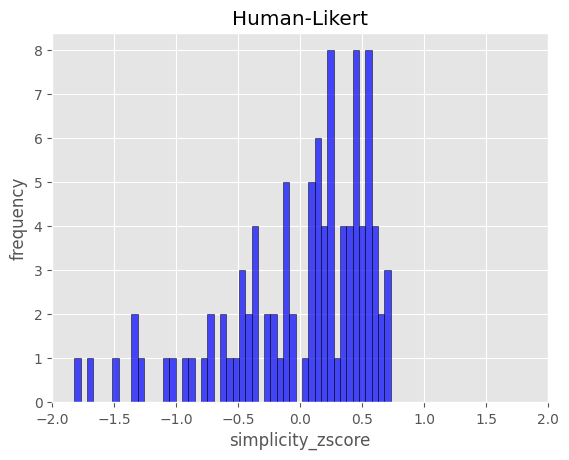

In [ ]:
df_hg_all_grouped['simplicity_zscore'].hist(bins=50, color='b', alpha=0.7,edgecolor='black')
plt.title('Human-Likert')
plt.xlim(-2,2)
plt.xlabel('simplicity_zscore')
plt.ylabel('frequency')

In [ ]:
simpda_2022 = pd.read_csv("./src/LENS-master/data/simpDA_2022.csv")
simplicity_zscore = standardise_ratings(simpda_2022, rater_id='WorkerId', aspect="Answer.simplicity")
fluency_zscore = standardise_ratings(simpda_2022, rater_id='WorkerId', aspect="Answer.fluency")
meaning_zscore = standardise_ratings(simpda_2022, rater_id='WorkerId', aspect="Answer.adequacy")
simpda_2022["simplicity_zscore"] = simplicity_zscore
simpda_2022["fluency_zscore"] = fluency_zscore
simpda_2022["meaning_zscore"] = meaning_zscore
simpda_2022['segment_id'] = simpda_2022['Input.id'].astype(str) + '_' + simpda_2022['Input.system']
simpda_2022["rater_num"] = simpda_2022.groupby(["segment_id"]).cumcount()
simpda_2022_grouped = simpda_2022.groupby(['segment_id']).mean().drop(['WorkerId', 'Answer.simplicity', 'Answer.fluency', 'Answer.adequacy', 'rater_num'], axis=1).astype({"Input.id":int}).reset_index()
simpda_2022_grouped['sent_id'] = simpda_2022_grouped['segment_id'].apply(lambda x: x.split(sep='_')[0]).astype(int)
simpda_2022_grouped['sys_name'] = simpda_2022_grouped['segment_id'].apply(lambda x: x.split(sep='_')[1]).astype(str)
simpda_2022_grouped = simpda_2022_grouped.merge(simpda_2022[['segment_id', 'Input.original', 'Input.simplified']].drop_duplicates(), on=['segment_id'])
#simpda_2022_grouped = simpda_2022_grouped.merge(simpda_2022[['segment_id', 'Input.original', 'Input.simplified']], on=['segment_id']).drop_duplicates()
simpda_2022_grouped.rename(columns={'Input.original': 'orig_sent', 'Input.simplified': 'simp_sent'}, inplace=True)

<ipython-input-5-8e19abba0475>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  simpda_2022_grouped = simpda_2022.groupby(['segment_id']).mean().drop(['WorkerId', 'Answer.simplicity', 'Answer.fluency', 'Answer.adequacy', 'rater_num'], axis=1).astype({"Input.id":int}).reset_index()


Text(0, 0.5, 'frequency')

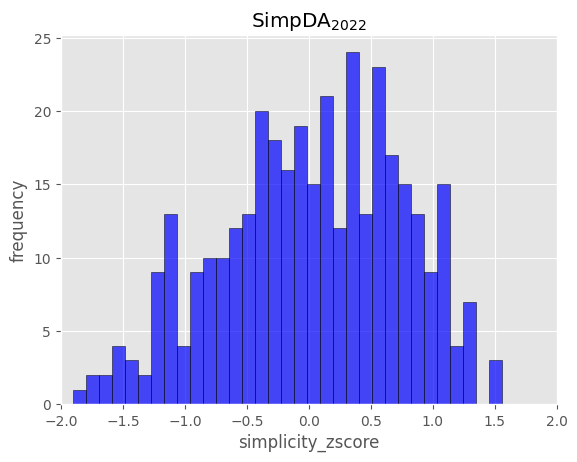

In [ ]:
plt.style.use('ggplot')
simpda_2022_grouped['simplicity_zscore'].hist(bins=50, color='b', alpha=0.7,edgecolor='black')
plt.title(r'SimpDA${_\mathrm{2022}}$')
plt.xlim(-2,2)
plt.xlabel('simplicity_zscore')
plt.ylabel('frequency')

In [ ]:
len(simpda_2022_grouped)

360

<Axes: >

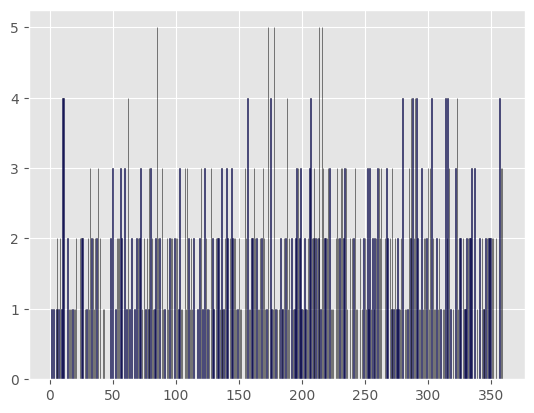

In [ ]:
df_simplicityDA['sent_id'].hist(bins=1000, color='b', alpha=0.7,edgecolor='black')

In [ ]:
len(df_simplicityDA['sent_id'].unique())

302

In [ ]:
df_simplicityDA['sent_id'].value_counts()

178    5
85     5
173    5
216    5
214    5
      ..
151    1
204    1
117    1
312    1
148    1
Name: sent_id, Length: 302, dtype: int64

In [ ]:
df_simplicityDA.sort_values(by=['sent_id'])

In [ ]:
df_simplicityDA[df_simplicityDA['sent_id'] == 5]

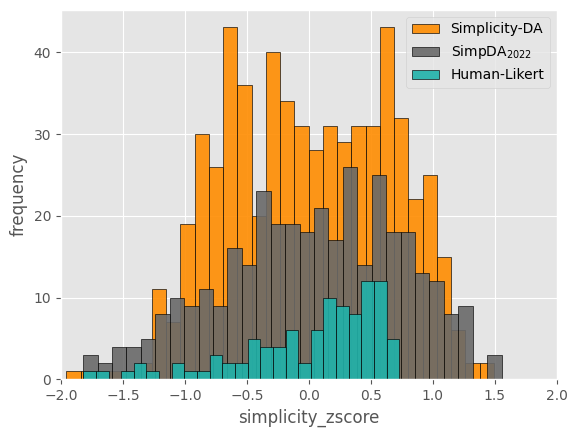

In [ ]:
df_simplicityDA['simplicity_zscore'].hist(bins=30, color='darkorange', alpha=0.9,edgecolor='black', label='Simplicity-DA')
#plt.title('Simplicity-DA')
plt.xlim(-2,2)
plt.xlabel('simplicity_zscore')
plt.ylabel('frequency')

simpda_2022_grouped['simplicity_zscore'].hist(bins=45, color='dimgray', alpha=0.9,edgecolor='black', label='SimpDA${_\mathrm{2022}}$')
#plt.title(r'SimpDA${_\mathrm{2022}}$')
plt.xlim(-2,2)
plt.xlabel('simplicity_zscore')
plt.ylabel('frequency')

df_hg_all_grouped['simplicity_zscore'].hist(bins=25, color='lightseagreen', alpha=0.9,edgecolor='black', label='Human-Likert')
#plt.title('Human-Likert')
plt.xlim(-2,2)
plt.xlabel('simplicity_zscore')
plt.ylabel('frequency')

plt.legend()
plt.savefig('dist2.pdf', format='pdf')

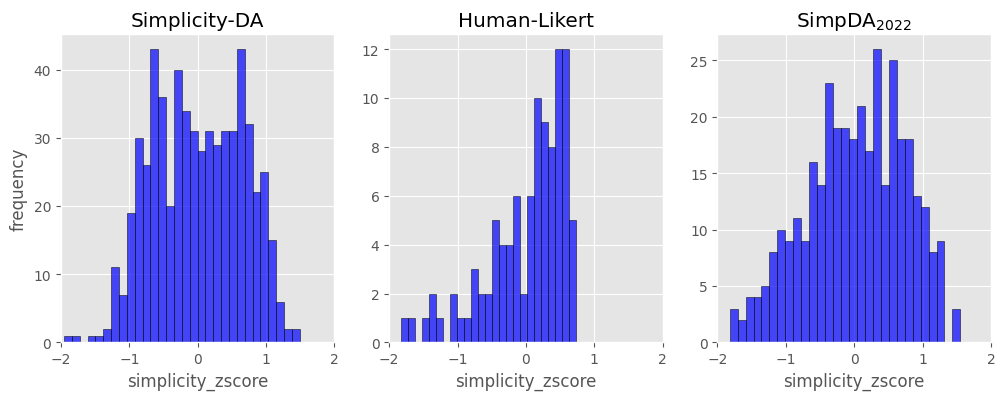

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].hist(df_simplicityDA['simplicity_zscore'], bins=30, color='b', alpha=0.7,edgecolor='black')
ax[0].set_title('Simplicity-DA')
ax[0].set_xlim(-2,2)
ax[0].set_xlabel('simplicity_zscore')
ax[0].set_ylabel('frequency')

ax[1].hist(df_hg_all_grouped['simplicity_zscore'], bins=25, color='b', alpha=0.7,edgecolor='black')
ax[1].set_title('Human-Likert')
ax[1].set_xlim(-2,2)
ax[1].set_xlabel('simplicity_zscore')

ax[2].hist(simpda_2022_grouped['simplicity_zscore'], bins=45, color='b', alpha=0.7,edgecolor='black')
ax[2].set_title(r'SimpDA${_\mathrm{2022}}$')
ax[2].set_xlim(-2,2)
ax[2].set_xlabel('simplicity_zscore')
plt.savefig('dist.pdf', format='pdf')

In [ ]:
smed = simpda_2022_grouped['simplicity_zscore'].median()
shind = simpda_2022_grouped['simplicity_zscore'] > smed
slind = simpda_2022_grouped['simplicity_zscore'] <= smed
fmed = simpda_2022_grouped['fluency_zscore'].median()
fhind = simpda_2022_grouped['fluency_zscore'] > fmed
flind = simpda_2022_grouped['fluency_zscore'] <= fmed
mmed = simpda_2022_grouped['meaning_zscore'].median()
mhind = simpda_2022_grouped['meaning_zscore'] > mmed
mlind = simpda_2022_grouped['meaning_zscore'] <= mmed
fmhind = (simpda_2022_grouped['fluency_zscore'] > fmed) & (simpda_2022_grouped['meaning_zscore'] > mmed)
fmlind = (simpda_2022_grouped['fluency_zscore'] <= fmed) & (simpda_2022_grouped['meaning_zscore'] <= mmed)
smfhind = (simpda_2022_grouped['simplicity_zscore'] > smed) & (simpda_2022_grouped['fluency_zscore'] > fmed) & (simpda_2022_grouped['meaning_zscore'] > mmed)
smflind = (simpda_2022_grouped['simplicity_zscore'] <= smed) & (simpda_2022_grouped['fluency_zscore'] <= fmed) & (simpda_2022_grouped['meaning_zscore'] <= mmed)
df_scores_slow = simpda_2022_grouped[slind]
df_scores_shigh = simpda_2022_grouped[shind]
df_scores_flow = simpda_2022_grouped[flind]
df_scores_fhigh = simpda_2022_grouped[fhind]
df_scores_mlow = simpda_2022_grouped[mlind]
df_scores_mhigh = simpda_2022_grouped[mhind]
df_scores_fmlow = simpda_2022_grouped[fmlind]
df_scores_fmhigh = simpda_2022_grouped[fmhind]
df_scores_sfmlow = simpda_2022_grouped[smflind]
df_scores_sfmhigh = simpda_2022_grouped[smfhind]

In [ ]:
print(len(df_scores_sfmhigh['simplicity_zscore']))
print(len(df_scores_sfmlow['simplicity_zscore']))

54
53


In [ ]:
df_scores_sfmhigh['simplicity_zscore'].std()

0.33654609786533507

In [ ]:
df_scores_sfmlow['simplicity_zscore'].std()

0.6549595759874401

In [ ]:
df_simplicityDA['simplicity_zscore'].std()

0.6537396386215125

In [ ]:
df_hg_all_grouped['simplicity_zscore'].std()

0.579141939437884

In [ ]:
simpda_2022_grouped['simplicity_zscore'].std()

0.7652955881986577

In [ ]:
simpda_2022_grouped[(simpda_2022_grouped['simplicity_zscore'] >= -2) & (simpda_2022_grouped['simplicity_zscore'] <= 2)]['simplicity_zscore'].std()

0.725618731839063

## import

In [ ]:
import numpy as np
import pandas as pd
#import pingouin as pg
from scipy.stats import zscore, spearmanr, pearsonr
from tqdm import tqdm
import nltk

from itertools import combinations
import numpy as np
import pandas as pd
from scipy.stats import zscore, pearsonr, t
from scipy.stats.mstats import mquantiles
from sklearn.metrics import cohen_kappa_score


def _standardise_ratings(df, rater_id_cols, aspect_col):
    return df.groupby(rater_id_cols)[aspect_col].transform(lambda x: zscore(x))


def _simulate_two_annotators(ratings, num_ratings_annotatorA=1):
    ratings_shuffled = np.random.permutation(ratings)
    ratingA = np.mean(ratings_shuffled[:num_ratings_annotatorA])
    ratingB = np.mean(ratings_shuffled[num_ratings_annotatorA:])
    return [ratingA, ratingB]


def compute_inter_annotator_agreement(df_ratings, segment_id_cols, rater_id_cols, aspects,
                                      n_bins=5, use_quantiles=True, n_simulations=1000):
    iaa_per_aspect = {}
    for aspect in aspects:
        if f"{aspect}_zscore" not in df_ratings.columns:
            df_ratings[f"{aspect}_zscore"] = _standardise_ratings(df_ratings, rater_id_cols, aspect)
        df_scores = df_ratings[segment_id_cols + [f'{aspect}_zscore']]
        # Bin the data in n_bins
        if use_quantiles:  # equally-distributed
            _, bins_ranges = pd.qcut(df_scores[f'{aspect}_zscore'], q=n_bins, retbins=True)
        else:  # equally-spaced
            _, bins_ranges = pd.cut(df_scores[f'{aspect}_zscore'], bins=n_bins, retbins=True)
        kappa_values = []
        for _ in tqdm(range(n_simulations)):
            ratings_simulation = df_scores.groupby(segment_id_cols)[f'{aspect}_zscore'].apply(_simulate_two_annotators).to_list()
            raterA, raterB = zip(*ratings_simulation)
            kappa_values.append(cohen_kappa_score(np.digitize(raterA, bins_ranges), np.digitize(raterB, bins_ranges), weights='quadratic'))
        iaa_per_aspect[aspect] = (np.mean(kappa_values), np.std(kappa_values))
    return iaa_per_aspect


def compute_segment_scores(df_ratings, segment_id_cols, rater_id_cols, aspects):
    scores_cols = []
    for aspect in aspects:
        df_ratings[f"{aspect}_zscore"] = _standardise_ratings(df_ratings, rater_id_cols, aspect)
        scores_cols += [aspect, f"{aspect}_zscore"]
    df_segment_scores = df_ratings.groupby(segment_id_cols)[scores_cols].agg([np.mean])
    df_segment_scores.columns = [a for a, _ in df_segment_scores.columns]

    return df_segment_scores


def _select_pairs_in_group(group, min_score_difference=25):
    data = []
    for (system_a, score_a, zscore_a), (system_b, score_b, zscore_b) in combinations(group.values, 2):
        # select the pair if its absolute difference in DA scores is greater than 25
        if abs(score_a - score_b) > min_score_difference:
            data.append([system_a, score_a, zscore_a, system_b, score_b, zscore_b])
    df_selected_pairs = pd.DataFrame(data,
                                     columns=['system_a', "score_a", "zscore_a", "system_b", "score_b", "zscore_b"])
    return df_selected_pairs


def select_segment_pairs(df_human_scores, aspect, sentence_id_cols, system_id_cols):
    df_scores = df_human_scores.reset_index()
    cols_of_interest = system_id_cols + [aspect, f"{aspect}_zscore"]
    selected_pairs = (df_scores.groupby(sentence_id_cols)[cols_of_interest].apply(_select_pairs_in_group)
                                .reset_index(level=1, drop=True)
                                .reset_index())
    return selected_pairs


def compute_relative_ranking_correlations(df_human_scores, df_metrics_scores, aspect, segment_id_cols,
                                           use_absolute_values=True):
    df_da_scores = df_human_scores.reset_index()
    cols_of_interest = segment_id_cols + [aspect, f"{aspect}_zscore"]
    df_da_scores = df_da_scores[cols_of_interest]
    df_all_scores = pd.merge(left=df_metrics_scores, right=df_da_scores, on=segment_id_cols)

    # Compute correlations metrics vs human scores
    print("Computing correlations...")
    metrics_names = [col for col in df_metrics_scores.columns if col not in segment_id_cols]
    correlations_data = []
    for metric in metrics_names:
        corr, p_value = spearmanr(df_all_scores[metric], df_all_scores[f'{aspect}_zscore'])
        if use_absolute_values:
            corr = abs(corr)
        correlations_data.append([metric, corr, p_value])
    df_correlations_metrics_human = pd.DataFrame(correlations_data, columns=['metric', 'corr', 'p_value'])
    df_correlations_metrics_human.sort_values(by=['corr'], ascending=False, inplace=True, ignore_index=True)

    # Compute correlations metrics vs metrics
    metrics_names = df_correlations_metrics_human['metric'].to_list()
    correlations_data = []
    for _, (metric_a, corr_metric_a, _) in df_correlations_metrics_human.iterrows():
        for _, (metric_b, corr_metric_b, _) in df_correlations_metrics_human.iterrows():
            corr_a_b, pvalue_a_b = pearsonr(df_all_scores[metric_a], df_all_scores[metric_b])
            if use_absolute_values:
                corr_a_b = abs(corr_a_b)
            correlations_data.append([metric_a, corr_metric_a,
                                      metric_b, corr_metric_b,
                                      corr_a_b, pvalue_a_b])
    df_correlations_metric_metric = pd.DataFrame(correlations_data,
                                                 columns=['metric_a', 'corr_metric_a',
                                                          'metric_b', 'corr_metric_b',
                                                          'corr_a_b', 'pvalue_a_b'])

    # Determine if the difference in performance is significant
    print("Determining if the difference in performance is significant...")
    significance_matrix = []
    winner_status = []
    for metric_a in metrics_names:
        df_correlations = df_correlations_metric_metric[df_correlations_metric_metric['metric_a'] == metric_a]
        is_winner = True
        significance_row = []
        for _, (_, corr_metric_a, metric_b, corr_metric_b, corr_a_b, _) in df_correlations.iterrows():
            p = np.nan
            if (metric_a != metric_b) and (corr_metric_a > corr_metric_b):
                _, p = williams_test(corr_metric_a, corr_metric_b, corr_a_b, len(df_human_scores))
            is_diff_stats_significant = p < 0.05
            if not is_diff_stats_significant:
                # we do not care about the exact values in cases where it's not significant
                p = np.nan
            significance_row.append(p)
            # Update winner status (not significantly outperformed by any other metric)
            if metric_a != metric_b:
                is_winner = is_winner and is_diff_stats_significant
        significance_matrix.append(significance_row)
        winner_status.append(is_winner)
    df_correlations_metrics_human['is_winner'] = winner_status
    df_significance = pd.DataFrame(np.array(significance_matrix), columns=metrics_names, index=metrics_names)

    return df_correlations_metrics_human, df_significance

def kendall_tau_wmt(df_scores):
    concordant = 0
    discordant = 0
    for _, (score_a, score_b, metric_a, metric_b) in df_scores.iterrows():
        if score_a < score_b:
            if metric_a < metric_b:
                concordant += 1
            else:
                discordant += 1
        elif score_a > score_b:
            if metric_a <= metric_b:
                discordant += 1
            else:
                concordant += 1

    return (abs(concordant) - abs(discordant)) / (abs(concordant) + abs(discordant))


def compute_direct_assessment_correlations(df_human_scores, df_metrics_scores, aspect, segment_id_cols,
                                           use_absolute_values=True):
    df_da_scores = df_human_scores.reset_index()
    cols_of_interest = segment_id_cols + [aspect, f"{aspect}_zscore"]
    df_da_scores = df_da_scores[cols_of_interest]
    df_all_scores = pd.merge(left=df_metrics_scores, right=df_da_scores, on=segment_id_cols)

    # Compute correlations metrics vs human scores
    print("Computing correlations...")
    metrics_names = [col for col in df_metrics_scores.columns if col not in segment_id_cols]
    correlations_data = []
    for metric in metrics_names:
        corr, p_value = pearsonr(df_all_scores[metric], df_all_scores[f'{aspect}_zscore'])
        if use_absolute_values:
            corr = abs(corr)
        correlations_data.append([metric, corr, p_value])
    df_correlations_metrics_human = pd.DataFrame(correlations_data, columns=['metric', 'corr', 'p_value'])
    df_correlations_metrics_human.sort_values(by=['corr'], ascending=False, inplace=True, ignore_index=True)

    # Compute correlations metrics vs metrics
    metrics_names = df_correlations_metrics_human['metric'].to_list()
    correlations_data = []
    for _, (metric_a, corr_metric_a, _) in df_correlations_metrics_human.iterrows():
        for _, (metric_b, corr_metric_b, _) in df_correlations_metrics_human.iterrows():
            corr_a_b, pvalue_a_b = pearsonr(df_all_scores[metric_a], df_all_scores[metric_b])
            if use_absolute_values:
                corr_a_b = abs(corr_a_b)
            correlations_data.append([metric_a, corr_metric_a,
                                      metric_b, corr_metric_b,
                                      corr_a_b, pvalue_a_b])
    df_correlations_metric_metric = pd.DataFrame(correlations_data,
                                                 columns=['metric_a', 'corr_metric_a',
                                                          'metric_b', 'corr_metric_b',
                                                          'corr_a_b', 'pvalue_a_b'])

    # Determine if the difference in performance is significant
    print("Determining if the difference in performance is significant...")
    significance_matrix = []
    winner_status = []
    for metric_a in metrics_names:
        df_correlations = df_correlations_metric_metric[df_correlations_metric_metric['metric_a'] == metric_a]
        is_winner = True
        significance_row = []
        for _, (_, corr_metric_a, metric_b, corr_metric_b, corr_a_b, _) in df_correlations.iterrows():
            p = np.nan
            if (metric_a != metric_b) and (corr_metric_a > corr_metric_b):
                _, p = williams_test(corr_metric_a, corr_metric_b, corr_a_b, len(df_human_scores))
            is_diff_stats_significant = p < 0.05
            if not is_diff_stats_significant:
                # we do not care about the exact values in cases where it's not significant
                p = np.nan
            significance_row.append(p)
            # Update winner status (not significantly outperformed by any other metric)
            if metric_a != metric_b:
                is_winner = is_winner and is_diff_stats_significant
        significance_matrix.append(significance_row)
        winner_status.append(is_winner)
    df_correlations_metrics_human['is_winner'] = winner_status
    df_significance = pd.DataFrame(np.array(significance_matrix), columns=metrics_names, index=metrics_names)

    return df_correlations_metrics_human, df_significance


# From https://github.com/inmoonlight/nlp-williams/blob/master/williams.py
def williams_test(r12, r13, r23, n):
    """The Williams test (Evan J. Williams. 1959. Regression Analysis, volume 14. Wiley, New York, USA)
    A test of whether the population correlation r12 equals the population correlation r13.
    Significant: p < 0.05
    Arguments:
        r12 (float): correlation between x1, x2
        r13 (float): correlation between x1, x3
        r23 (float): correlation between x2, x3
        n (int): size of the population
    Returns:
        t (float): Williams test result
        p (float): p-value of t-dist
    """
    assert (r12 >= r13), "r12 should be larger than r13"
    assert (n > 3), "n should be larger than 3"

    K = 1 - r12 ** 2 - r13 ** 2 - r23 ** 2 + 2 * r12 * r13 * r23
    denominator = np.sqrt(
        2 * K * (n - 1) / (n - 3) + (((r12 + r13) ** 2) / 4) * ((1 - r23) ** 3)
    )
    numerator = (r12 - r13) * np.sqrt((n - 1) * (1 + r23))
    p = 1 - t.cdf(numerator / denominator, df=n - 3)  # changed to n-3 on 30/11/14
    return t, p



In [ ]:
def compute_direct_correlations(df_benchmark, df_segment_metrics, aspects, test_sets, segment_id_cols):
    results = {}
    for aspect in aspects:
        smed = df_benchmark['simplicity_zscore'].median()
        shind = df_benchmark['simplicity_zscore'] > smed
        slind = df_benchmark['simplicity_zscore'] <= smed
        fmed = df_benchmark['fluency_zscore'].median()
        fhind = df_benchmark['fluency_zscore'] > fmed
        flind = df_benchmark['fluency_zscore'] <= fmed
        mmed = df_benchmark['meaning_zscore'].median()
        mhind = df_benchmark['meaning_zscore'] > mmed
        mlind = df_benchmark['meaning_zscore'] <= mmed
        fmhind = (df_benchmark['fluency_zscore'] > fmed) & (df_benchmark['meaning_zscore'] > mmed)
        fmlind = (df_benchmark['fluency_zscore'] <= fmed) & (df_benchmark['meaning_zscore'] <= mmed)
        smfhind = (df_benchmark['simplicity_zscore'] > smed) & (df_benchmark['fluency_zscore'] > fmed) & (df_benchmark['meaning_zscore'] > mmed)
        smflind = (df_benchmark['simplicity_zscore'] <= smed) & (df_benchmark['fluency_zscore'] <= fmed) & (df_benchmark['meaning_zscore'] <= mmed)
        df_scores_slow = df_benchmark[slind]
        df_scores_shigh = df_benchmark[shind]
        df_scores_flow = df_benchmark[flind]
        df_scores_fhigh = df_benchmark[fhind]
        df_scores_mlow = df_benchmark[mlind]
        df_scores_mhigh = df_benchmark[mhind]
        df_scores_fmlow = df_benchmark[fmlind]
        df_scores_fmhigh = df_benchmark[fmhind]
        df_scores_sfmlow = df_benchmark[smflind]
        df_scores_sfmhigh = df_benchmark[smfhind]

        print(f"{aspect}: simp_high ({len(df_scores_shigh)}) - simp_low ({len(df_scores_slow)}) - flu_low ({len(df_scores_flow)}) - flu_high ({len(df_scores_fhigh)}) - mean_low ({len(df_scores_mlow)}) - mean_high ({len(df_scores_mhigh)}) - fm_low ({len(df_scores_fmlow)}) - fm_high ({len(df_scores_fmhigh)}) - sfm_low ({len(df_scores_sfmlow)}) - sfm_high ({len(df_scores_sfmhigh)}) - All ({len(df_benchmark)})")
        for quality, df_scores in {'simp_low': df_scores_slow, 'simp_high': df_scores_shigh, 'flu_low': df_scores_flow, 'flu_high': df_scores_fhigh, 'mean_low': df_scores_mlow, 'mean_high': df_scores_mhigh, 'fm_low': df_scores_fmlow, 'fm_high': df_scores_fmhigh, 'sfm_low': df_scores_sfmlow, 'sfm_high': df_scores_sfmhigh, 'all': df_benchmark}.items():
            for test_set in test_sets:
                print(f"Computing for {quality} scores - {test_set} references")
                df_metrics = df_segment_metrics[df_segment_metrics.test_set==test_set].drop(columns=['test_set'])
                results[(quality, aspect, test_set)] = compute_direct_assessment_correlations(
                    df_scores,
                    df_metrics,
                    aspect,
                    segment_id_cols=segment_id_cols,
                    use_absolute_values=False
                )
                print()
    return results

In [ ]:
def compute_ranking_correlations(df_benchmark, df_segment_metrics, aspects, test_sets, segment_id_cols):
    results = {}
    for aspect in aspects:
        smed = df_benchmark['simplicity_zscore'].median()
        shind = df_benchmark['simplicity_zscore'] > smed
        slind = df_benchmark['simplicity_zscore'] <= smed
        fmed = df_benchmark['fluency_zscore'].median()
        fhind = df_benchmark['fluency_zscore'] > fmed
        flind = df_benchmark['fluency_zscore'] <= fmed
        mmed = df_benchmark['meaning_zscore'].median()
        mhind = df_benchmark['meaning_zscore'] > mmed
        mlind = df_benchmark['meaning_zscore'] <= mmed
        fmhind = (df_benchmark['fluency_zscore'] > fmed) & (df_benchmark['meaning_zscore'] > mmed)
        fmlind = (df_benchmark['fluency_zscore'] <= fmed) & (df_benchmark['meaning_zscore'] <= mmed)
        smfhind = (df_benchmark['simplicity_zscore'] > smed) & (df_benchmark['fluency_zscore'] > fmed) & (df_benchmark['meaning_zscore'] > mmed)
        smflind = (df_benchmark['simplicity_zscore'] <= smed) & (df_benchmark['fluency_zscore'] <= fmed) & (df_benchmark['meaning_zscore'] <= mmed)
        df_scores_slow = df_benchmark[slind]
        df_scores_shigh = df_benchmark[shind]
        df_scores_flow = df_benchmark[flind]
        df_scores_fhigh = df_benchmark[fhind]
        df_scores_mlow = df_benchmark[mlind]
        df_scores_mhigh = df_benchmark[mhind]
        df_scores_fmlow = df_benchmark[fmlind]
        df_scores_fmhigh = df_benchmark[fmhind]
        df_scores_sfmlow = df_benchmark[smflind]
        df_scores_sfmhigh = df_benchmark[smfhind]

        print(f"{aspect}: simp_high ({len(df_scores_shigh)}) - simp_low ({len(df_scores_slow)}) - flu_low ({len(df_scores_flow)}) - flu_high ({len(df_scores_fhigh)}) - mean_low ({len(df_scores_mlow)}) - mean_high ({len(df_scores_mhigh)}) - fm_low ({len(df_scores_fmlow)}) - fm_high ({len(df_scores_fmhigh)}) - sfm_low ({len(df_scores_sfmlow)}) - sfm_high ({len(df_scores_sfmhigh)}) - All ({len(df_benchmark)})")
        for quality, df_scores in {'simp_low': df_scores_slow, 'simp_high': df_scores_shigh, 'flu_low': df_scores_flow, 'flu_high': df_scores_fhigh, 'mean_low': df_scores_mlow, 'mean_high': df_scores_mhigh, 'fm_low': df_scores_fmlow, 'fm_high': df_scores_fmhigh, 'sfm_low': df_scores_sfmlow, 'sfm_high': df_scores_sfmhigh, 'all': df_benchmark}.items():
            for test_set in test_sets:
                print(f"Computing for {quality} scores - {test_set} references")
                df_metrics = df_segment_metrics[df_segment_metrics.test_set==test_set].drop(columns=['test_set'])
                results[(quality, aspect, test_set)] = compute_relative_ranking_correlations(
                    df_human_scores=df_scores,
                    df_metrics_scores=df_metrics,
                    aspect=aspect,
                    segment_id_cols=segment_id_cols,
                    #sentence_id_cols=['sent_id'],
                    #system_id_cols=['sys_name'],
                    use_absolute_values=False,
                )
                print()
    return results

## filtering for silver

In [ ]:
df_metrics_segment_silver = df_metrics_segment[df_metrics_segment.index.isin(df_simplicityDA_silver.index)].copy()

## direct assessment

In [ ]:
results_simplicity = compute_direct_correlations(
                        df_simplicityDA_silver,
                        df_metrics_segment_silver,
                        aspects=['simplicity'],
                        test_sets=['asset'],
                        segment_id_cols=['sent_id','sys_name']
                    )

simplicity: simp_high (60) - simp_low (60) - flu_low (60) - flu_high (60) - mean_low (60) - mean_high (60) - fm_low (43) - fm_high (43) - sfm_low (40) - sfm_high (36) - All (120)
Computing for simp_low scores - asset references
Computing correlations...
Determining if the difference in performance is significant...

Computing for simp_high scores - asset references
Computing correlations...
Determining if the difference in performance is significant...

Computing for flu_low scores - asset references
Computing correlations...
Determining if the difference in performance is significant...

Computing for flu_high scores - asset references
Computing correlations...
Determining if the difference in performance is significant...

Computing for mean_low scores - asset references
Computing correlations...
Determining if the difference in performance is significant...

Computing for mean_high scores - asset references
Computing correlations...
Determining if the difference in performance is si

In [ ]:
results_simplicity[('all', 'simplicity', 'asset')][0]

,metric,corr,p_value,is_winner
0,bertscore_P,0.602371,3.383133e-13,False
1,ibleu,0.590120,1.314378e-12,False
2,bertscore_F1,0.578175,4.677745e-12,False
3,bleu,0.573060,7.931885e-12,False
4,amean_bleu_sari,0.551529,6.649026e-11,False
5,gmean_bleu_sari,0.542583,1.539681e-10,False
6,bertscore_R,0.507837,3.212305e-09,False
7,amean_bleu_samsa,0.403936,4.760168e-06,False
8,sari,0.324126,3.044754e-04,False
9,gmean_bleu_samsa,0.315129,4.554222e-04,False


## relative ranking


In [ ]:
results_simplicity = compute_ranking_correlations(
                        df_simplicityDA_silver,
                        df_metrics_segment_silver,
                        aspects=['simplicity'],
                        test_sets=['asset'],
                        segment_id_cols=['sent_id','sys_name']
                    )

simplicity: simp_high (60) - simp_low (60) - flu_low (60) - flu_high (60) - mean_low (60) - mean_high (60) - fm_low (43) - fm_high (43) - sfm_low (40) - sfm_high (36) - All (120)
Computing for simp_low scores - asset references
Computing correlations...
Determining if the difference in performance is significant...

Computing for simp_high scores - asset references
Computing correlations...
Determining if the difference in performance is significant...

Computing for flu_low scores - asset references
Computing correlations...
Determining if the difference in performance is significant...

Computing for flu_high scores - asset references
Computing correlations...
Determining if the difference in performance is significant...

Computing for mean_low scores - asset references
Computing correlations...
Determining if the difference in performance is significant...

Computing for mean_high scores - asset references
Computing correlations...
Determining if the difference in performance is si

In [ ]:
results_simplicity[('all', 'simplicity', 'asset')][0]

,metric,corr,p_value,is_winner
0,bertscore_P,0.595296,7.459964e-13,False
1,bertscore_F1,0.535792,2.865384e-10,False
2,ibleu,0.532072,4.003345e-10,False
3,bleu,0.511467,2.375891e-09,False
4,amean_bleu_sari,0.481179,2.650672e-08,False
5,bertscore_R,0.476503,3.769000e-08,False
6,gmean_bleu_sari,0.458136,1.428862e-07,False
7,amean_bleu_samsa,0.325551,2.853364e-04,False
8,sari,0.293506,1.139864e-03,False
9,gmean_bleu_samsa,0.260092,4.119088e-03,False
